# **TSLA Stock Data Pre-Processing**

In [1]:
!pip install ta

In [2]:
import warnings
warnings.filterwarnings("ignore")

import ta
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import statsmodels as smt
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt

### Downloading TSLA Stock data from Yahoo Finance package

Yahoo Finance is a widely used platform for accessing financial information, including stock market data, company profiles, historical stock prices, and more. To facilitate easy access to this data, there is a Python package called "yfinance" (short for Yahoo Finance) that provides a simple and convenient way to interact with Yahoo Finance's API.

The yfinance package allows users to fetch financial data for stocks, exchange-traded funds (ETFs), indices, and more. It provides functions to download historical stock data, real-time stock quotes, company information, and financial statements. The package is built on top of the popular data manipulation library, pandas, making it easy to integrate with existing data analysis workflows.

With yfinance, users can specify the desired stock ticker symbols, specify a date range, and retrieve a wide range of financial data. This includes daily historical prices, dividend information, stock splits, and more. The package also supports the ability to download data for multiple symbols at once, making it efficient for analyzing and comparing multiple stocks or assets.

In addition to historical data, yfinance allows users to obtain real-time stock quotes, including the current price, volume, market capitalization, and other relevant metrics. This can be useful for monitoring real-time market activity or building trading algorithms.

Overall, the yfinance package provides a convenient and efficient way to access and analyze financial data from Yahoo Finance using Python. It is a valuable tool for financial analysts, researchers, and developers who need to retrieve and analyze stock market data for various purposes.

In [3]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,4,28)

TSLA = yf.download('TSLA',start_date ,end_date)
TSLA.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
831,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000
832,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600
833,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300
834,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100


### Importing F-F Research Data Factors dataset

The F-F Research Data Factors daily dataset, also known as the Fama-French factors dataset, is a widely used financial dataset that provides daily risk factors for asset pricing models. It is named after its creators, Eugene Fama and Kenneth French, who developed the dataset to study and analyze stock returns.

The dataset includes several factors that are commonly used in empirical finance research. These factors include the market risk premium (Mkt-RF), which represents the excess return of the overall market over the risk-free rate, and three additional factors: the size premium (SMB), the value premium (HML), and the risk-free rate (RF).

The size premium (SMB) captures the excess return of small-cap stocks over large-cap stocks, while the value premium (HML) represents the excess return of value stocks over growth stocks. The risk-free rate (RF) is the return on a risk-free investment, such as Treasury bills.

Researchers and analysts often use the F-F Research Data Factors daily dataset to investigate the relationship between these factors and stock returns. By incorporating these factors into asset pricing models, researchers can assess the performance and risk characteristics of various investment strategies and study the impact of different market factors on stock returns.

The dataset is typically provided in a tabular format, such as a CSV file, allowing for easy integration into data analysis workflows using tools like Python's pandas library. Analysts can load the dataset, explore the factors' time series, and conduct various statistical analyses and modeling techniques to gain insights into the relationship between these factors and asset returns.

Overall, the F-F Research Data Factors daily dataset is a valuable resource for researchers, academics, and financial professionals interested in studying asset pricing models, evaluating investment strategies, and analyzing stock market data.

In [5]:
df_ff_features = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", skiprows=4)
df_ff_features.rename(columns = {'Unnamed: 0':'Date'},inplace=True)

In [6]:
df_ff_features.tail()

,Date,Mkt-RF,SMB,HML,RF
25476,20230425,-1.76,-0.99,0.10,0.018
25477,20230426,-0.41,0.15,-0.75,0.018
25478,20230427,1.85,-0.56,0.00,0.018
25479,20230428,0.77,0.14,0.17,0.018
25480,Copyright 2023 Kenneth R. French,NaN,NaN,NaN,NaN


In [7]:
df_ff_features.reset_index(drop = True, inplace= True)
df_ff_features = df_ff_features[(df_ff_features.Date > '20200101') & (df_ff_features.Date <= '20230427')]
df_ff_features['Date']=pd.to_datetime(df_ff_features['Date'])
df_ff_features

,Date,Mkt-RF,SMB,HML,RF
24643,2020-01-02,0.86,-0.88,-0.34,0.006
24644,2020-01-03,-0.67,0.38,0.01,0.006
24645,2020-01-06,0.36,-0.07,-0.55,0.006
24646,2020-01-07,-0.19,-0.01,-0.25,0.006
24647,2020-01-08,0.47,-0.06,-0.64,0.006
...,...,...,...,...,...
25474,2023-04-21,0.07,0.26,-0.92,0.018
25475,2023-04-24,0.00,-0.40,0.47,0.018
25476,2023-04-25,-1.76,-0.99,0.10,0.018
25477,2023-04-26,-0.41,0.15,-0.75,0.018


In [8]:
TSLA_Final = TSLA.merge(df_ff_features, how='left', on='Date')

In [9]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.86,-0.88,-0.34,0.006
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,0.006
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,0.006
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,0.006
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,0.006
...,...,...,...,...,...,...,...,...,...,...,...
831,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,0.018
832,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,0.018
833,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,0.018
834,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,0.018


In [10]:
# Yesterday's Close Price
TSLA_Final['Yest_Close']  = TSLA_Final['Adj Close'].shift(1)

In [11]:
# Tesla Stock Returns
TSLA_Final['stock_return'] = (TSLA_Final['Adj Close']-TSLA_Final['Yest_Close'])/(TSLA_Final['Yest_Close'])

In [12]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Yest_Close,stock_return
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.86,-0.88,-0.34,0.006,NaN,NaN
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,0.006,28.684000,0.029633
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,0.006,29.534000,0.019255
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,0.006,30.102667,0.038801
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,0.006,31.270666,0.049205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,0.018,162.990005,0.012823
832,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,0.018,165.080002,-0.015326
833,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,0.018,162.550003,-0.011566
834,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,0.018,160.669998,-0.043070


In [13]:
TSLA_Final = TSLA_Final[TSLA_Final['Yest_Close'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['Mkt-RF'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['SMB'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['HML'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['RF'].notna()]

### Adding Extra Additional Stock Features of Moving Averages, MACD & RSI

In [14]:
# Calculate additional features
TSLA_Final["SMA_20"] = ta.trend.sma_indicator(TSLA_Final["Close"], window=20, fillna = True)
TSLA_Final["SMA_50"] = ta.trend.sma_indicator(TSLA_Final["Close"], window=50, fillna = True)

TSLA_Final["EMA_12"] = ta.trend.ema_indicator(TSLA_Final["Close"], window=12, fillna = True)
TSLA_Final["EMA_26"] = ta.trend.ema_indicator(TSLA_Final["Close"], window=26, fillna = True)
TSLA_Final["MACD"] = ta.trend.macd(TSLA_Final["Close"], fillna = True)

TSLA_Final["RSI"] = ta.momentum.rsi(TSLA_Final["Close"], fillna = True)

In [15]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Yest_Close,stock_return,SMA_20,SMA_50,EMA_12,EMA_26,MACD,RSI
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,0.006,28.684000,0.029633,29.534000,29.534000,29.534000,29.534000,0.000000,100.000000
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,0.006,29.534000,0.019255,29.818334,29.818334,29.621488,29.576124,0.045364,100.000000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,0.006,30.102667,0.038801,30.302444,30.302444,29.875207,29.701645,0.173562,100.000000
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,0.006,31.270666,0.049205,30.929167,30.929167,30.326611,29.931845,0.394767,100.000000
5,2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,0.65,-0.64,-0.49,0.006,32.809334,-0.021945,31.161200,31.161200,30.597799,30.091659,0.506141,80.061839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,0.018,162.990005,0.012823,186.435500,190.798200,179.692929,183.898405,-4.205476,35.309424
832,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,0.018,165.080002,-0.015326,185.042500,189.902800,177.055556,182.317042,-5.261486,33.974557
833,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,0.018,162.550003,-0.011566,183.485500,189.178400,174.534701,180.713557,-6.178856,32.976902
834,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,0.018,160.669998,-0.043070,181.713499,188.360600,171.337055,178.716257,-7.379202,29.538571


### Importing ADS Index

In [16]:
ads_df = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')

In [17]:
ads_df.tail()

,Unnamed: 0,ADS_Index
23114,2023-06-13,-0.134883
23115,2023-06-14,-0.132031
23116,2023-06-15,-0.129347
23117,2023-06-16,-0.126831
23118,2023-06-17,-0.124481


In [18]:
ads_df.rename(columns = {'Unnamed: 0':'Date'},inplace=True)
ads_df['Date'] = pd.to_datetime(ads_df['Date'])

In [19]:
TSLA_Final = TSLA_Final.merge(ads_df, how='left', on='Date')

In [20]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Yest_Close,stock_return,SMA_20,SMA_50,EMA_12,EMA_26,MACD,RSI,ADS_Index
0,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,0.006,28.684000,0.029633,29.534000,29.534000,29.534000,29.534000,0.000000,100.000000,-0.271155
1,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,0.006,29.534000,0.019255,29.818334,29.818334,29.621488,29.576124,0.045364,100.000000,-0.231671
2,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,0.006,30.102667,0.038801,30.302444,30.302444,29.875207,29.701645,0.173562,100.000000,-0.219192
3,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,0.006,31.270666,0.049205,30.929167,30.929167,30.326611,29.931845,0.394767,100.000000,-0.207062
4,2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,0.65,-0.64,-0.49,0.006,32.809334,-0.021945,31.161200,31.161200,30.597799,30.091659,0.506141,80.061839,-0.195279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,0.018,162.990005,0.012823,186.435500,190.798200,179.692929,183.898405,-4.205476,35.309424,0.156027
831,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,0.018,165.080002,-0.015326,185.042500,189.902800,177.055556,182.317042,-5.261486,33.974557,0.142498
832,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,0.018,162.550003,-0.011566,183.485500,189.178400,174.534701,180.713557,-6.178856,32.976902,0.136458
833,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,0.018,160.669998,-0.043070,181.713499,188.360600,171.337055,178.716257,-7.379202,29.538571,0.129873


### Adding Competitor Stock Data for Analysis

* Nio Inc. (NIO)
* Li Auto Inc. (LI)
* Rivian Automotive Inc. (RIVN)
* General Motors Co. (GM)
* Toyota Motor Corp. (TM)
* Ford Motor Co. (F)
* RACE NV (RACE)

In [21]:
NIO = yf.download('NIO',start_date ,end_date)
NIO.reset_index(inplace=True)

# LI = yf.download('LI',start_date ,end_date)
# LI.reset_index(inplace=True)

# RIVN = yf.download('RIVN',start_date ,end_date)
# RIVN.reset_index(inplace=True)

GM = yf.download('GM',start_date ,end_date)
GM.reset_index(inplace=True)

TM = yf.download('TM',start_date ,end_date)
TM.reset_index(inplace=True)

F = yf.download('F',start_date ,end_date)
F.reset_index(inplace=True)

RACE = yf.download('RACE',start_date ,end_date)
RACE.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
NIO['NIO Yest_Close'] = NIO['Adj Close'].shift(periods=1)
# LI['LI Yest_Close'] = LI['Adj Close'].shift(periods=1)
# RIVN['RIVN Yest_Close'] = RIVN['Adj Close'].shift(periods=1)
GM['GM Yest_Close'] = GM['Adj Close'].shift(periods=1)
TM['TM Yest_Close'] = TM['Adj Close'].shift(periods=1)
F['F Yest_Close'] = F['Adj Close'].shift(periods=1)
RACE['RACE Yest_Close'] = RACE['Adj Close'].shift(periods=1)

In [23]:
TSLA_Final = TSLA_Final.merge(NIO[['Date', 'NIO Yest_Close']], how='left', on='Date')
# TSLA_Final = TSLA_Final.merge(LI_Final, how='left', on='Date')
# TSLA_Final = TSLA_Final.merge(RIVN_Final, how='left', on='Date')
TSLA_Final = TSLA_Final.merge(GM[['Date', 'GM Yest_Close']], how='left', on='Date')
TSLA_Final = TSLA_Final.merge(TM[['Date', 'TM Yest_Close']], how='left', on='Date')
TSLA_Final = TSLA_Final.merge(F[['Date', 'F Yest_Close']], how='left', on='Date')
TSLA_Final = TSLA_Final.merge(RACE[['Date', 'RACE Yest_Close']], how='left', on='Date')

In [24]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,...,EMA_12,EMA_26,MACD,RSI,ADS_Index,NIO Yest_Close,GM Yest_Close,TM Yest_Close,F Yest_Close,RACE Yest_Close
0,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,...,29.534000,29.534000,0.000000,100.000000,-0.271155,3.72,36.576313,142.240005,8.292237,164.115646
1,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,...,29.621488,29.576124,0.045364,100.000000,-0.231671,3.83,35.539101,140.750000,8.107378,162.382065
2,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,...,29.875207,29.701645,0.173562,100.000000,-0.219192,3.68,35.069416,140.770004,8.063366,161.525040
3,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,...,30.326611,29.931845,0.394767,100.000000,-0.207062,3.24,34.394257,141.509995,8.142590,160.911453
4,2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,0.65,-0.64,-0.49,...,30.597799,30.091659,0.506141,80.061839,-0.195279,3.39,33.905006,141.160004,8.142590,164.144867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,...,179.692929,183.898405,-4.205476,35.309424,0.156027,8.28,33.446861,133.800003,11.723577,274.025513
831,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,...,177.055556,182.317042,-5.261486,33.974557,0.142498,8.33,33.456833,134.669998,11.664318,276.040985
832,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,...,174.534701,180.713557,-6.178856,32.976902,0.136458,8.29,34.194778,134.839996,12.009999,280.190002
833,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,...,171.337055,178.716257,-7.379202,29.538571,0.129873,7.90,32.818611,133.509995,11.770000,277.209991


In [25]:
TSLA_Final = TSLA_Final[TSLA_Final['NIO Yest_Close'].notna()]
# TSLA_Final = TSLA_Final[TSLA_Final['LI Yest_Close'].notna()]
# TSLA_Final = TSLA_Final[TSLA_Final['RIVN Yest_Close'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['GM Yest_Close'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['TM Yest_Close'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['F Yest_Close'].notna()]
TSLA_Final = TSLA_Final[TSLA_Final['RACE Yest_Close'].notna()]

In [26]:
TSLA_Final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,...,EMA_12,EMA_26,MACD,RSI,ADS_Index,NIO Yest_Close,GM Yest_Close,TM Yest_Close,F Yest_Close,RACE Yest_Close
0,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,-0.67,0.38,0.01,...,29.534000,29.534000,0.000000,100.000000,-0.271155,3.72,36.576313,142.240005,8.292237,164.115646
1,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.36,-0.07,-0.55,...,29.621488,29.576124,0.045364,100.000000,-0.231671,3.83,35.539101,140.750000,8.107378,162.382065
2,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,-0.19,-0.01,-0.25,...,29.875207,29.701645,0.173562,100.000000,-0.219192,3.68,35.069416,140.770004,8.063366,161.525040
3,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.47,-0.06,-0.64,...,30.326611,29.931845,0.394767,100.000000,-0.207062,3.24,34.394257,141.509995,8.142590,160.911453
4,2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,0.65,-0.64,-0.49,...,30.597799,30.091659,0.506141,80.061839,-0.195279,3.39,33.905006,141.160004,8.142590,164.144867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,0.07,0.26,-0.92,...,179.692929,183.898405,-4.205476,35.309424,0.156027,8.28,33.446861,133.800003,11.723577,274.025513
831,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,0.00,-0.40,0.47,...,177.055556,182.317042,-5.261486,33.974557,0.142498,8.33,33.456833,134.669998,11.664318,276.040985
832,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,-1.76,-0.99,0.10,...,174.534701,180.713557,-6.178856,32.976902,0.136458,8.29,34.194778,134.839996,12.009999,280.190002
833,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,-0.41,0.15,-0.75,...,171.337055,178.716257,-7.379202,29.538571,0.129873,7.90,32.818611,133.509995,11.770000,277.209991


In [27]:
TSLA_Final.to_csv('TSLA_Final_Dataset.csv', index = False, sep = ',')

### Correlation Matrix of Final Dataframe to check the multi-collinearity between variables

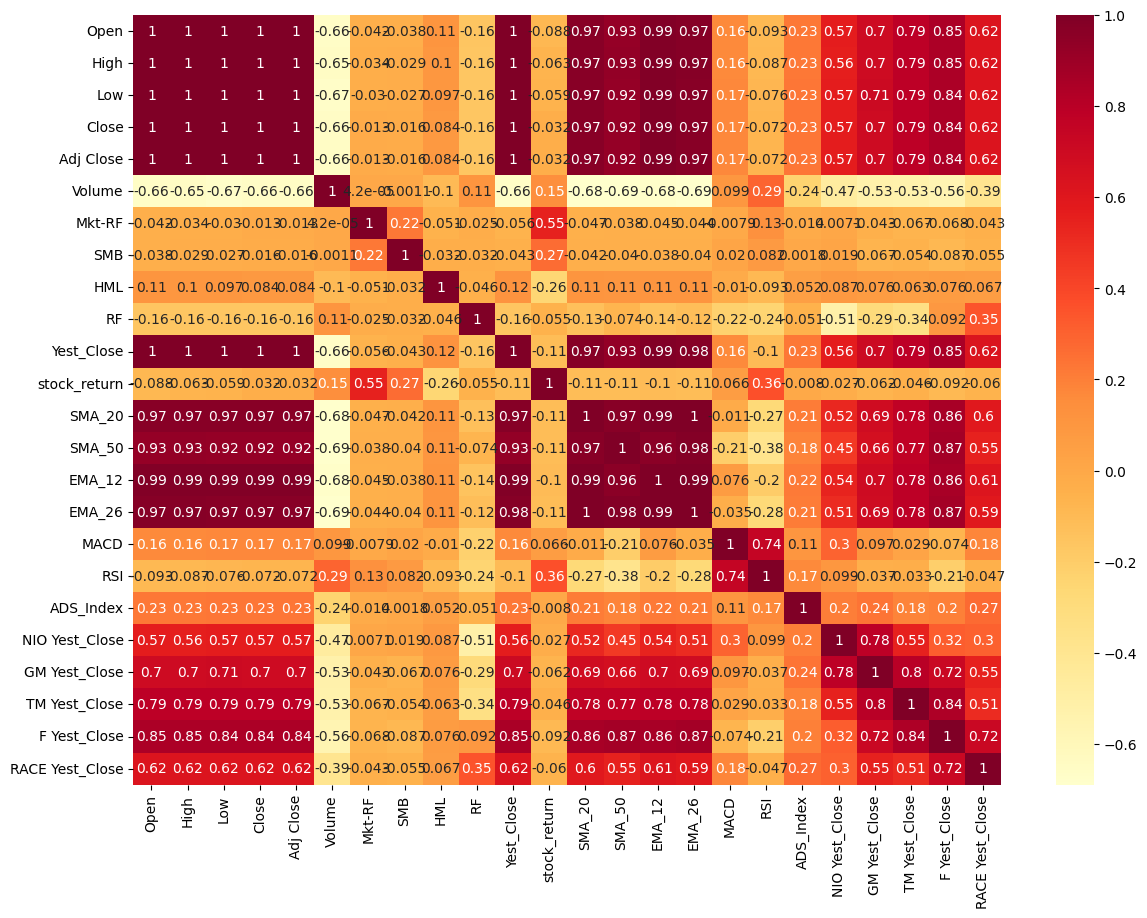

In [28]:
x = TSLA_Final.iloc[1:, 1:]
y = TSLA_Final.iloc[:, -2]
corrmat = TSLA_Final.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,10))
hm = sns.heatmap(TSLA_Final[top_corr_features].corr(), annot = True, cmap = "YlOrRd")

In [35]:
X = TSLA_Final[['Mkt-RF', 'SMB', 'HML', 'ADS_Index']]/100
y = TSLA_Final['stock_return'] - TSLA_Final['RF']
X = sm.add_constant(X)

ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.10e-79
Time:                        16:07:08   Log-Likelihood:                 1577.4
No. Observations:                 835   AIC:                            -3145.
Df Residuals:                     830   BIC:                            -3121.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -0.988      0.3

In [36]:
X

,const,Mkt-RF,SMB,HML,ADS_Index
0,1.0,-0.0067,0.0038,0.0001,-0.002712
1,1.0,0.0036,-0.0007,-0.0055,-0.002317
2,1.0,-0.0019,-0.0001,-0.0025,-0.002192
3,1.0,0.0047,-0.0006,-0.0064,-0.002071
4,1.0,0.0065,-0.0064,-0.0049,-0.001953
...,...,...,...,...,...
830,1.0,0.0007,0.0026,-0.0092,0.001560
831,1.0,0.0000,-0.0040,0.0047,0.001425
832,1.0,-0.0176,-0.0099,0.0010,0.001365
833,1.0,-0.0041,0.0015,-0.0075,0.001299


In [37]:
y

0      0.023633
1      0.013255
2      0.032801
3      0.043205
4     -0.027945
         ...   
830   -0.005177
831   -0.033326
832   -0.029566
833   -0.061070
834    0.023886
Length: 835, dtype: float64

In [38]:
ff_model.params

const       -0.001259
Mkt-RF       1.431071
SMB          0.844804
HML         -0.771524
ADS_Index    0.015738
dtype: float64